デリバティブ1
=====

Black-Sholesモデルからオプションの現在価値を求めたい

## 1. 理論

### 1.1 前提
- [ブラック–ショールズ方程式 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%96%E3%83%A9%E3%83%83%E3%82%AF%E2%80%93%E3%82%B7%E3%83%A7%E3%83%BC%E3%83%AB%E3%82%BA%E6%96%B9%E7%A8%8B%E5%BC%8F)
>ブラック–ショールズモデルとは、1種類の配当のない株と1種類の債券の2つが存在する証券市場のモデルである。さらに連続的な取引が可能で、市場は完全市場であることを仮定している。

- 参考：
[経済数学の直観的方法 確率・統計編 (ブルーバックス)](https://www.amazon.co.jp/%E7%B5%8C%E6%B8%88%E6%95%B0%E5%AD%A6%E3%81%AE%E7%9B%B4%E8%A6%B3%E7%9A%84%E6%96%B9%E6%B3%95-%E7%A2%BA%E7%8E%87%E3%83%BB%E7%B5%B1%E8%A8%88%E7%B7%A8-%E3%83%96%E3%83%AB%E3%83%BC%E3%83%90%E3%83%83%E3%82%AF%E3%82%B9-%E9%95%B7%E6%B2%BC-%E4%BC%B8%E4%B8%80%E9%83%8E/dp/4062579855)

### 1.2. 伊東のレンマ
変数$x$の微小変化について以下の式が成り立つ状況を考える

$$
dx = A_1 dt + B_1 dw \:\:\:\:\:(1)
$$

ここで、第一項は一定方向に動く成分・第二項は確率的な変動による成分である。

この$x$に依存した変数$y$があり、$y = F(x)$というかたちで連動しているとき、$y$の時間変化を知ることが目的である。
そのためには、$y$の微小変化を

$$
dy = A_2 dt + B_2 dw \:\:\:\:\:(2)
$$

というかたちで表現できるとうれしい。

Taylor展開を考えると、

$$
y + dy = F(x + dx) = F(x) + \frac{dF}{dx} dx + \frac{1}{2}\frac{d^2F}{dx^2} dx^2 + \:... \:\:\:\:\:(3)
$$

ここで、$y = F(x)$より

$$
dy = \frac{dF}{dx} dx + \frac{1}{2}\frac{d^2F}{dx^2} dx^2 + \: ...  \:\:\:\:\:(4)
$$

(1)を(4)に代入して

$$
dy = \frac{dF}{dx} (A_1 dt + B_1 dw) + \frac{1}{2}\frac{d^2F}{dx^2} (A_1 dt + B_1 dw)^2 + \: ... \:\:\:\:\:(5)
$$

基本的にはここで微小変動の一次の項だけ残すことになる。
ただし、ランダム成分$dw$は時間$t$に対して$\sqrt{t}$で拡大するため$dw^2 = dt$であるから、$dt, dw$に加えて$dw^2$の項も$dt$と置き換えて残すこととし、

$$
dy = (\frac{dF}{dx} A_1 + \frac{1}{2}\frac{d^2F}{dx^2} B_1^2) dt +   \frac{dF}{dx} B_1 dw \:\:\:\:\:(6)
$$

となる。今までは無視していたが、連動性$F$が時間的に変化する場合は以下のように修正する。

$$
dy = (\frac{\partial F}{\partial x} A_1 + \frac{\partial F}{\partial t} +  \frac{1}{2}\frac{\partial^2F}{\partial x^2} B_1^2) dt +   \frac{\partial F}{\partial x} B_1 dw \:\:\:\:\:(6)'
$$

この時点で、

$$
\begin{eqnarray}
  \left\{
    \begin{array}{l}
      A_2 = (\frac{\partial F}{\partial x} A_1 + \frac{\partial F}{\partial t} +  \frac{1}{2}\frac{\partial^2F}{\partial x^2} B_1^2) \:\:\:\:\:(7a) \\
      B_2 =  \frac{\partial F}{\partial x} B_1 \:\:\:\:\:(7b)
    \end{array}
  \right.
\end{eqnarray}
$$
とおけば、$y$の微小変化を

$$
dy = A_2 dt + B_2 dw \:\:\:\:\:(8)
$$

というかたちで表現できたことになる。


### 1.3. Black-Sholes Model

時刻$t$における株価$S_t$は、配当を無視し金利を一定とすれば、以下の確率微分方程式でモデル化できる。

$$
\frac{dS_t}{S_t} = r dt + \sigma dW_t  \:\:\:\:\:(9)
$$

あるいは

$$
dS_t = (r S_t ) dt + (\sigma S_t ) dW_t \:\:\:\:\:(9)'
$$

※ $\sigma$ : ボラティリティ, $r$ : ドリフト, $W_t$ : 標準ウィーナー過程

#### 1.2.1. 株価$S_t$の計算

(9)を$S_t$について解きたい。
伊藤のレンマで$x=S_t, y =F(x) = log(x)$とすると、$A_1 = r S_t = r x, B_1 = \sigma S_t = \sigma x$と対応し、式(6)は

$$
\begin{eqnarray}
dy &=& (\frac{dF}{dx} (r x) + \frac{1}{2}\frac{d^2F}{dx^2} (\sigma x)^2) dt +   \frac{dF}{dx} (\sigma x)dW_t \:\:\:\:\:(10a) \\
   &=& (\frac{1}{x} (r x) - \frac{1}{2}\frac{1}{x^2} (\sigma x)^2) dt + \frac{1}{x} (\sigma x)dW_t \:\:\:\:\:(10b) \\
   &=& (r- \frac{1}{2} \sigma^2) dt + \sigma dW_t \:\:\:\:\:(10c) 
\end{eqnarray}
$$

となる。$y=log(x)=logS_t$で記号をもとに戻すと以下のようになる。

$$
dlogS_t =  (r- \frac{1}{2} \sigma^2) dt + \sigma dW_t \:\:\:\:\:(11)
$$

(11)を$t=0$からオプション満期$T$まで積分したい。(11)の左辺については、
$
\frac{dlogS_t}{dt} = \frac{1}{S_t}\frac{dS_t}{dt}
$
より
$dlogS_t = \frac{1}{S_t} dS_t$
（$t$: $0$ → $T$ で $S_t$: $S_0$ → $S_T$）
であるから、

$$
\int_{t=0}^{t=T} dlogS_t = \int_{S_0}^{S_T}  \frac{1}{S_t} dS_t = logS_T - logS_0 = log \frac{S_T}{S_0} \:\:\:\:\:(12)
$$

また、(11)の右辺については、

$$
\begin{eqnarray}
\int_{t=0}^{t=T} (r- \frac{1}{2} \sigma^2) dt + \int_{t=0}^{t=T} \sigma dW_t &=& [r- \frac{1}{2} \sigma^2]_0^T + \sigma \int_{t=0}^{t=T}  dW_t \\
&=& (r- \frac{1}{2} \sigma^2) T + \sigma W_t \\
&=& (r- \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} Z  \:\:\:\:\:(13)
\end{eqnarray}
$$

ただし、$Z \sim N(0, 1)$。

$dW_t$の積分については厳密には理解できていないが、ランダム成分$dW_t$は時間$t$に対して$\sqrt{t}$で拡大することを考えてとりあえず納得。

式(12)(13)より、式(11)の積分について

$$
log \frac{S_T}{S_0} = (r- \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} Z  \:\:\:\:\:(14)
$$

これを$S_t$について解くと、

$$
S_T = S_0 exp \biggl\{ (r- \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} Z \biggr\}  \:\:\:\:\:(14)'
$$

ここまでで、オプション満期における株価$S_T$を求めることができた。

#### 1.2.2 オプションの現在価値
> ヨーロピアン・オプションは、権利行使日（満期日）にのみ、権利行使ができるオプション取引をいいます。

European optionの満期$T$でのペイオフを$f(S_T)$・行使価格Kとすると、オプションの現在価値$V$は

$$
V = e^{-rT} E(f(S_T))  \:\:\:\:\:(15)
$$

と表現できる。（株価と行使価格の差によって得する分$f(S_T)$の期待値$E(f(S_T))$の割引現在価値）

ここで、$f(S)$は

- $f(S) = (S-K)^+ = max(0, S-K)$ : コールオプション
- $f(S) = (K-S)^+ = max(0, K-S)$ : プットオプション

であり、$r$は定数の無リスク利子率である。

式(15)に、式(14)'の$S_T$を代入すると、コールオプションの場合は

$$
V = e^{-rT} E \biggl[ \biggl( S_0 exp \biggl\{ (r- \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} Z \biggr\} - K \biggr)^+ \biggr]  \:\:\:\:\:(16)
$$

としてオプションの現在価値を求めることができる。（ここには$K$がないので、行使価格に上乗せされる分の現在価値が(16)?）


### 1.4. モンテカルロ法
$X_i$を独立同一分布な確率変数の列とし、サンプルを$x_i$とするとき、十分大きな$N$に対して$E(X)$を

$$
E(X) \approx \frac{1}{N} \sum_{i=1}^N x_i \:\:\:\:\:(17)
$$

と近似する。

オプションの現在価値の場合、$z_i$を正規分布$N(0, 1)$からのサンプルとすれば、式(16)より

$$
V \approx \frac{e^{-rT}}{N} \sum_{i=1}^N  \biggl( S_0 exp \biggl\{ (r- \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} z_i \biggr\} - K\biggr)^+  \:\:\:\:\:(18)
$$

と近似できる。

## 2. プログラム
### 2.1. ガウス分布からサンプリングする関数

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def GetOneGaussianBySummation():
    result = 0
    for j in range(12):
        result += random.random()
    result -= 6
    return result

In [4]:
def GetOneGaussianByBoxMuller():
    while True:
        x = 2.0 * random.random() - 1
        y = 2.0 * random.random() - 1
        sizeSquared = x*x + y*y
        
        if sizeSquared < 1.0:
            break
    
    result = x * np.sqrt(-2 * np.log(sizeSquared) / sizeSquared)
    return result

(array([   1.,    3.,    2.,    5.,    7.,   11.,   16.,   25.,   40.,
          47.,   71.,   83.,  122.,  147.,  213.,  242.,  274.,  333.,
         393.,  403.,  478.,  531.,  563.,  548.,  558.,  547.,  522.,
         511.,  521.,  443.,  409.,  366.,  311.,  284.,  222.,  211.,
         149.,  125.,   79.,   54.,   43.,   30.,   20.,    9.,   14.,
           6.,    3.,    3.,    1.,    1.]),
 array([-3.5811275 , -3.43734242, -3.29355735, -3.14977227, -3.0059872 ,
        -2.86220212, -2.71841705, -2.57463197, -2.4308469 , -2.28706182,
        -2.14327675, -1.99949168, -1.8557066 , -1.71192153, -1.56813645,
        -1.42435138, -1.2805663 , -1.13678123, -0.99299615, -0.84921108,
        -0.705426  , -0.56164093, -0.41785586, -0.27407078, -0.13028571,
         0.01349937,  0.15728444,  0.30106952,  0.44485459,  0.58863967,
         0.73242474,  0.87620982,  1.01999489,  1.16377997,  1.30756504,
         1.45135011,  1.59513519,  1.73892026,  1.88270534,  2.02649041,
         2.17027

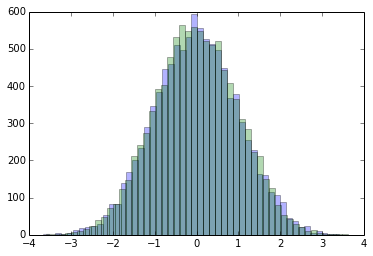

In [37]:
# Test
a = []
b = []
for i in range(10000):
    a.append(GetOneGaussianBySummation())
    b.append(GetOneGaussianByBoxMuller())
plt.hist(np.array(a), alpha=0.3, bins=50)
plt.hist(np.array(b), alpha=0.3, bins=50)

## 2.2. メイン

In [28]:
def SimpleMonteCarlo1(expiry, strike, spot, vol, r, numberOfPaths):
    """ コールオプションの現在価値を計算する
    
    - expiry: オプション満期T
    - strike: 行使価格K
    - spot: t=0での株価S_0
    - vol: ボラティリティσ
    - r: 無リスク利子率
    - numberOfPaths: モンテカルロ法のN
    """
    variance = vol * vol * expiry # σ^2 * T
    rootVariance = np.sqrt(variance) # σ * sqrt(T)
    itoCorrection = -0.5 * variance
    
    movedSpot = spot * np.exp(r*expiry + itoCorrection)
    runningSum = 0
    
    for i in range(numberOfPaths):
        thisGaussian = GetOneGaussianByBoxMuller()
        thisSpot = movedSpot * np.exp(rootVariance * thisGaussian)
        thisPayoff = thisSpot - strike
        if thisPayoff <= 0:
            thisPayoff = 0
        runningSum += thisPayoff
    
    mean = runningSum / numberOfPaths
    mean *= np.exp(-r*expiry)
    return mean

In [36]:
print SimpleMonteCarlo1(1., 1000., 900., 0.25, 1.01, 10000)

535.733367486
